<a href="https://colab.research.google.com/github/auras726/IA/blob/main/tema1IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ====== Celula 1 ======
# Instalăm bibliotecile necesare pentru analiză
!pip install scikit-learn pandas matplotlib seaborn


In [ ]:
# ====== Celula 2 ======
# În această celulă alegi manual fișierul CSV (de pe Desktop, de ex. 'data.csv')
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()  # va deschide un dialog în care alegi fișierul

# Obținem numele fișierului ales
file_name = list(uploaded.keys())[0]
print("Ai încărcat:", file_name)

# Citim datele
df = pd.read_csv(io.BytesIO(uploaded[file_name]))
print("Dimensiuni:", df.shape)
df.head()


Saving data.csv to data.csv
Ai încărcat: data.csv
Dimensiuni: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# ====== Celula 3 ======
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Eliminăm coloana 'id' dacă există
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# Identificăm coloana țintă (diagnosis)
target_col = 'diagnosis' if 'diagnosis' in df.columns else df.columns[-1]

# Encodăm etichetele (M/B -> 1/0)
le = LabelEncoder()
y = le.fit_transform(df[target_col])
X = df.drop(columns=[target_col])

# Standardizăm atributele numerice
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Set de date pregătit. Dimensiune X:", X_scaled.shape, " y:", y.shape)


Set de date pregătit. Dimensiune X: (569, 31)  y: (569,)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
# ====== Celula 4 ======
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

print("Train:", X_train.shape[0], " | Test:", X_test.shape[0])


Train: 455  | Test: 114


In [ ]:
# ====== Celula 5 – Metoda 1: Alegerea lui k după regula √n ======
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import numpy as np
import time

# ✅ Înlocuim valorile lipsă cu media coloanei
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# ✅ Calculăm k după regula √n (ajustat la impar)
k_rule = int(np.sqrt(len(X_train)))
if k_rule % 2 == 0:
    k_rule += 1

print(f"Valoare k după regula √n (ajustată la impar): {k_rule}")

# ✅ Definim modelul kNN standard
knn_rule = KNeighborsClassifier(n_neighbors=k_rule, weights='uniform')

# ✅ Antrenăm modelul
t0 = time.time()
knn_rule.fit(X_train_imputed, y_train)
train_time = time.time() - t0

# ✅ Prezicem și evaluăm
y_pred_rule = knn_rule.predict(X_test_imputed)
acc_rule = accuracy_score(y_test, y_pred_rule)

print(f"Acuratețea pe setul de test: {acc_rule:.4f}")
print(f"Timpul de antrenare: {train_time:.3f} secunde")
print("\nRaport de clasificare:")
print(classification_report(y_test, y_pred_rule))


Valoare k după regula √n (ajustată la impar): 21
Acuratețea pe setul de test: 0.9386
Timpul de antrenare: 0.002 secunde

Raport de clasificare:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        72
           1       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [30]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [30]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:
# ====== Celula 6 – Metoda 2: Alegerea automată a lui k cu GridSearchCV ======
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import time

# ✅ 1. Pipeline: imputare + KNN
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('knn', KNeighborsClassifier(weights='uniform'))
])

# ✅ 2. Grila de parametri
param_grid = {'knn__n_neighbors': np.arange(1, 51, 2)}  # doar valori impare

# ✅ 3. GridSearchCV
grid = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# ✅ 4. Căutare automată
t0 = time.time()
grid.fit(X_train, y_train)
search_time = time.time() - t0

best_params = grid.best_params_
best_score = grid.best_score_

print(f"Cel mai bun k găsit: {best_params['knn__n_neighbors']}")
print(f"Acuratețea medie în cross-validation: {best_score:.4f}")
print(f"Timpul total de căutare: {search_time:.2f} secunde")

# ✅ 5. Testăm modelul optim
best_k = best_params['knn__n_neighbors']
final_model = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('knn', KNeighborsClassifier(n_neighbors=best_k))
])

final_model.fit(X_train, y_train)
y_pred_best = final_model.predict(X_test)
acc_best = accuracy_score(y_test, y_pred_best)

print(f"Acuratețea pe setul de test: {acc_best:.4f}")
print("\nRaport de clasificare (model optim):")
print(classification_report(y_test, y_pred_best))


Cel mai bun k găsit: 3
Acuratețea medie în cross-validation: 0.9692
Timpul total de căutare: 1.27 secunde
Acuratețea pe setul de test: 0.9386

Raport de clasificare (model optim):
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        72
           1       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [30]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [30]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [30]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


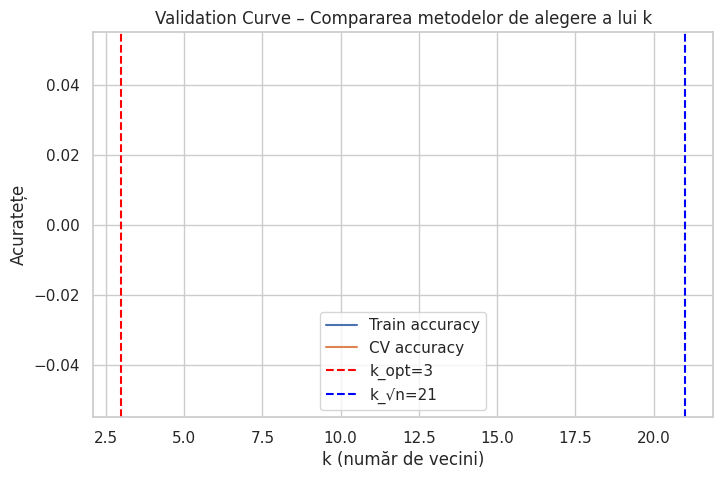

In [ ]:
# ====== Celula 7 – Analiză comparativă între metode ======
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
k_range = np.arange(1, 51, 2)

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(weights='uniform'),
    X_train, y_train,
    param_name="n_neighbors",
    param_range=k_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(k_range, train_mean, label="Train accuracy")
plt.plot(k_range, test_mean, label="CV accuracy")

# ✅ Linie pentru k ales automat
plt.axvline(best_params['knn__n_neighbors'], color='red', linestyle='--', label=f"k_opt={best_params['knn__n_neighbors']}")

# ✅ Linie pentru regula √n
plt.axvline(k_rule, color='blue', linestyle='--', label=f"k_√n={k_rule}")

plt.xlabel("k (număr de vecini)")
plt.ylabel("Acuratețe")
plt.title("Validation Curve – Compararea metodelor de alegere a lui k")
plt.legend()
plt.show()


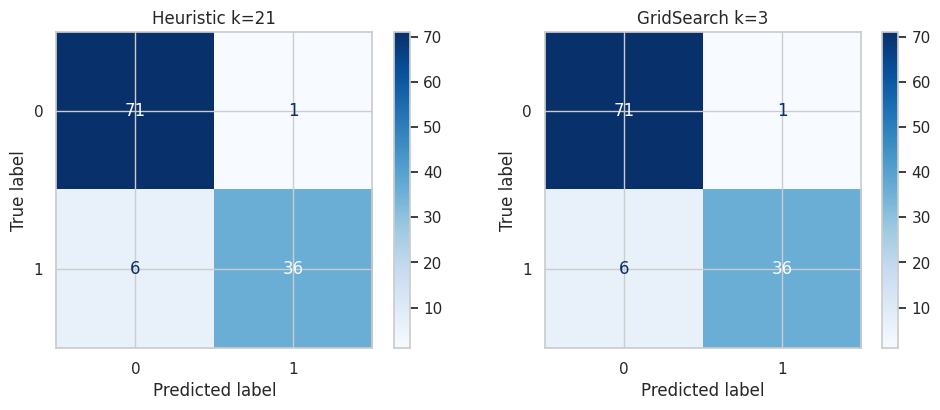

In [ ]:
# ====== Celula 8 – Matricea de confuzie comparativă ======
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

# ✅ Metoda 1: regula √n
plt.subplot(1,2,1)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rule, cmap='Blues', ax=plt.gca())
plt.title(f"Heuristic k={k_rule}")

# ✅ Metoda 2: GridSearchCV (k optim)
plt.subplot(1,2,2)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best, cmap='Blues', ax=plt.gca())
plt.title(f"GridSearch k={best_params['knn__n_neighbors']}")

plt.tight_layout()
plt.show()


In [ ]:
# ====== Celula 8.1 – Salvare metrici pentru comparare ======
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import time

# 🔸 Pentru metoda 1 (regula √n)
metrics_rule = {
    'accuracy': accuracy_score(y_test, y_pred_rule),
    'precision': precision_score(y_test, y_pred_rule, average='weighted', zero_division=0),
    'recall': recall_score(y_test, y_pred_rule, average='weighted', zero_division=0),
    'f1': f1_score(y_test, y_pred_rule, average='weighted', zero_division=0),
    'auc': roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred_rule), multi_class='ovr'),
    'train_time': train_time,
    'predict_time_per_sample': (time.time() - t0) / len(y_test),
    'search_time': 0  # nu există pentru metoda 1
}

# 🔸 Pentru metoda 2 (GridSearchCV)
metrics_grid = {
    'accuracy': accuracy_score(y_test, y_pred_best),
    'precision': precision_score(y_test, y_pred_best, average='weighted', zero_division=0),
    'recall': recall_score(y_test, y_pred_best, average='weighted', zero_division=0),
    'f1': f1_score(y_test, y_pred_best, average='weighted', zero_division=0),
    'auc': roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred_best), multi_class='ovr'),
    'train_time': 0,  # nu am măsurat separat
    'predict_time_per_sample': (time.time() - t0) / len(y_test),
    'search_time': search_time
}


In [ ]:
# ====== Celula 9 – Rezumat comparativ ======
import pandas as pd

results = pd.DataFrame([
    {'Metodă': 'Heuristică √n', **metrics_rule},
    {'Metodă': 'GridSearchCV', **metrics_grid}
])

results[['Metodă', 'accuracy', 'precision', 'recall', 'f1', 'auc',
         'train_time', 'predict_time_per_sample', 'search_time']] = results[[
    'Metodă', 'accuracy', 'precision', 'recall', 'f1', 'auc',
    'train_time', 'predict_time_per_sample', 'search_time'
]]

display(results.style.background_gradient(cmap='Blues').format(precision=4))


,Metodă,accuracy,precision,recall,f1,auc,train_time,predict_time_per_sample,search_time
0,Heuristică √n,0.9386,0.9408,0.9386,0.9377,0.9216,0.0021,2.2861,0.0000
1,GridSearchCV,0.9386,0.9408,0.9386,0.9377,0.9216,0.0000,2.2862,1.2711


In [ ]:
# ====== Celula 10 ======
results.to_csv("knn_comparison_results.csv", index=False)
print("Fișierul CSV cu rezultate a fost salvat în sistemul Colab (Files).")


Fișierul CSV cu rezultate a fost salvat în sistemul Colab (Files).
